In [9]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [10]:
dataset = fetch_california_housing()

In [11]:
x = dataset.data
y = dataset.target

## Einfache Lineare Regression

### Bedeutung

-   $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
-   coef: Steigung der Geraden
-   intercept: y-Achsenabschnitt

### Symbole

-   $\bar{x}$: Mittelwert von $x$
-   $\bar{y}$: Mittelwert von $y$
-   $\hat{y}$: Prediktion vom Modell

### Datensatz

-   $m$: Anzahl an Samples
-   $n$: Anzahl an Features
-   $x$: Input-Daten (Features)
-   $y$: Output Daten (Targets)

### Variablen

-   $x \in \mathbb{R}^{m,n}$
-   $y \in \mathbb{R}^{m,}$
-   coef, $\bar{x} \in \mathbb{R}^{n}$
-   intercept, $\bar{y} \in \mathbb{R}$

### Formeln

-   coef = $\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$
-   intercept = $\bar{y} - coef \cdot \bar{x}$
-   $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$
-   $\hat{y} = coef^T \cdot x + intercept$


In [12]:
class SimpleLinearRegression:
    def __init__(self) -> None:
        """
        Initializes the SimpleLinearRegression class.

        Parameters:
        None

        Returns:
        None
        """
        self.coef_: np.ndarray | None = None
        self.intercept_: np.ndarray | None = None

    def _compute_coef(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Compute the coefficient of the linear regression model.

        Parameters:
        x (np.ndarray): The input feature array.
        y (np.ndarray): The target array.

        Returns:
        None
        """
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sum((x - x_mean) ** 2)
        self.coef_ = numerator / denominator

    def _compute_intercept(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Compute the intercept of the linear regression model.

        Parameters:
        x (np.ndarray): The input features.
        y (np.ndarray): The target values.

        Returns:
        None
        """
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        self.intercept_ = y_mean - self.coef_.T * x_mean

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Fits the simple linear regression model to the given training data.

        Parameters:
        x (np.ndarray): Input features.
        y (np.ndarray): Target variable.

        Returns:
        None
        """
        self._compute_coef(x, y)
        self._compute_intercept(x, y)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicts the target variable for the given input data.

        Parameters:
        x (np.ndarray): Input data for prediction.

        Returns:
        np.ndarray: Predicted target variable.
        """
        return self.coef_.T * x + self.intercept_

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Computes the coefficient of determination (R^2) for the model.

        Parameters:
        x (np.ndarray): Input features.
        y (np.ndarray): Target variable.

        Returns:
        float: Coefficient of determination (R^2).
        """
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred) ** 2)
        denominator = np.sum((y - y_mean) ** 2)
        return 1.0 - (numerator / denominator)

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
x = dataset.data[:, 0]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
r2 = regr.score(x_test, y_test)

print(f"r2: {r2}")
print(f"m: {regr.coef_}")
print(f"b: {regr.intercept_}")

r2: 0.46012055309247235
m: 0.41977685412397886
b: 0.444783122386748


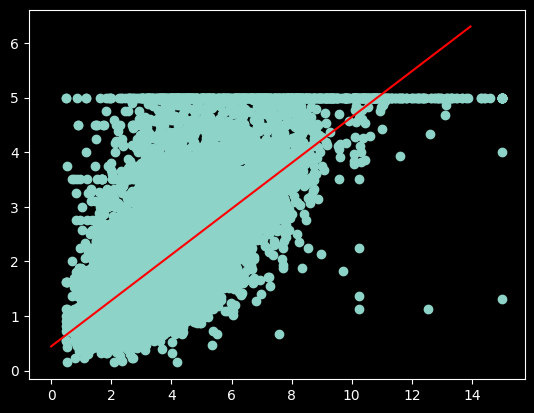

In [16]:
x_values = np.arange(start=0.0, stop=14.0, step=0.05).reshape((-1, 1))
y_values = regr.predict(x_values)

plt.scatter(x_train, y_train)
plt.plot(x_values, y_values, color="red")
plt.show()